# <center>РЕГУЛЯРИЗАЦИЯ</center>

>**Регуляризация** — способ уменьшения переобучения моделей машинного обучения.

Идея регуляризации состоит в том, что мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс.

>**Штраф** — это дополнительное неотрицательное слагаемое в выражении для функции потерь, которое специально повышает ошибку.  За счёт этого слагаемого метод оптимизации (OLS или SGD) будет находить не истинный минимум функции потерь, а псевдоминимум.

* **L1-регуляризация (Lasso)** — добавление к функции потерь суммы модулей коэффициентов, умноженных на коэффициент регуляризации $\alpha$:

$$ L_1(w) = MSE + \alpha \sum^m_{j=1}|w_j| $$

* **L2-регуляризация (Ridge)**, или **регуляризация Тихонова** — добавление к функции потерь суммы квадратов коэффициентов, умноженных на коэффициент регуляризации $\alpha$:

$$ L_2(w) = MSE + \alpha \sum^m_{j=1}(w_j)^2 $$

**Коэффициенты $\alpha$** (альфа) — это коэффициенты регуляризации. Они отвечают за то, насколько сильное смещение мы будем вносить в модель: чем оно больше, тем сильнее будет штраф за переобучение.

Минимум функции потерь в трёхмерном пространстве (вид сверху). Первый метод, $ L_1(w) $, заставляет искать минимум функции потерь на пересечении его с ромбом, а второй, $ L_2(w) $, — с окружностью:

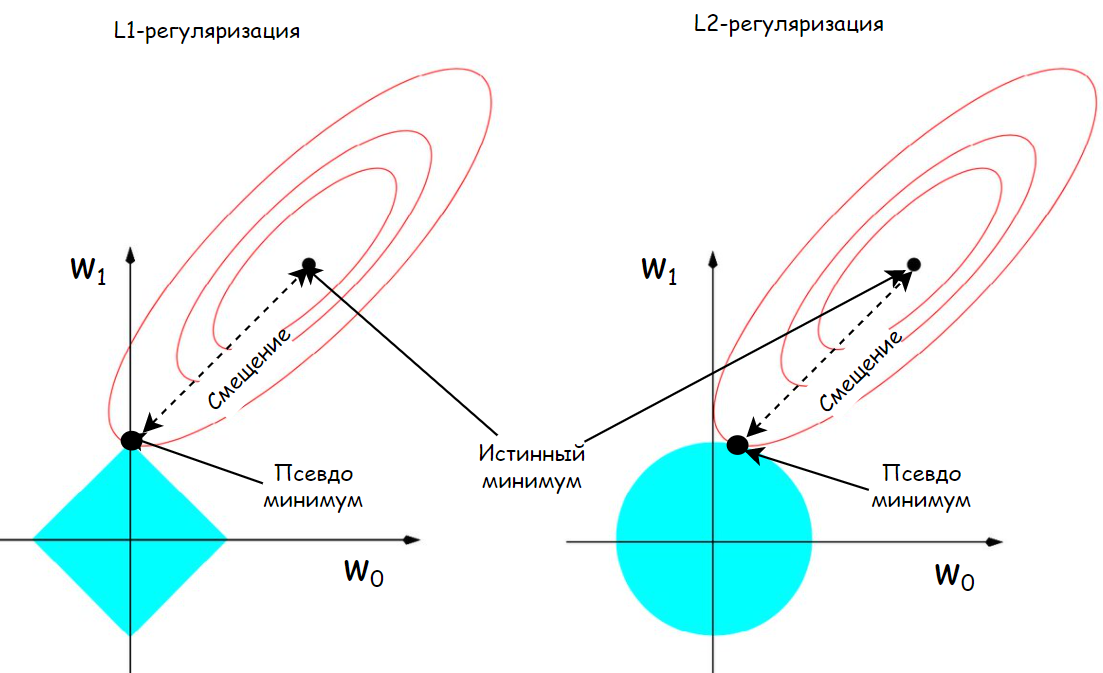

На рисунках выше изображено решение задачи поиска минимума функций.

**Для левого рисунка**:

$$ L_1(w) = \frac{\sum^n_{i=1}(y_i - w_0 - w_1x_1)^2}{n} + \alpha(|w_0| + |w_1|) \to min_w $$

**Для правого рисунка**:

$$ L_2(w) = \frac{\sum^n_{i=1}(y_i - w_0 - w_1x_1)^2}{n} + \alpha((w_0)^2 + (w_1)^2) \to min_w $$

Красными концентрическими кругами (линиями равного уровня) изображена функция потерь $ MSE $. Дополнительное регуляризационное слагаемое $\lambda_1 = \alpha(|w_0| + |w_1|)$ задаёт уравнение ромба, а слагаемое $\lambda_2 = \alpha((w_0)^2 + (w_1)^2)$ — уравнение окружности.

Таким образом, в результате добавления смещения $\lambda_i$ мы находим не настоящий минимум, а **псевдоминимум**, который лежит на пересечении с ромбом при $L1$ (окружностью — при $L2$). Такая оптимизация называется **условной**, или **оптимизацией с ограничениями**.

> В реализации `sklearn` для решения задачи оптимизации используется итеративный алгоритм координатного спуска (аналог градиентного спуска, но не использующий производную).

Отличительной особенностью L1-регуляризации является то, что коэффициенты, которые соответствуют «ненужным», по мнению модели, факторам, обнуляются, то есть факторы просто не будут участвовать в предсказании. Это очень важно для сложных моделей, в обучении которых используются множество факторов. Тем самым мы уменьшим сложность модели, сократим её разброс и, как следствие, уменьшим переобучение.

>Практика показывает, что обучение линейной регрессии с большим количеством признаков рекомендуется производить на стандартизованных (нормализованных) данных.

Стандартизацию (нормализацию) полезнее проводить перед генерацией полиномиальных признаков, иначе можно потерять масштаб полиномов.

## Эластичная сетка

**Эластичная сетка (Elastic Net)** — это комбинация из двух методов регуляризации. Функция потерь в таком методе выглядит следующим образом:

$$ L_2(w) = MSE + \alpha \cdot \lambda \sum^m_{i=1}|w_i| + \alpha \cdot (1-\lambda) \sum^m_{i=1}(w_i)^2 \to min_w $$

В sklearn реализация эластичной сетки находится в объекте класса `sklearn.linear_model.ElasticNet`.

Регуляризация присутствует и в модели `SGDRegressor`, причём она используется по умолчанию. В инициализаторе данного класса есть параметр `penalty`, который позволяет управлять методом регуляризации. Параметр может принимать значения `l1`, `l2` и `elasticnet`. По умолчанию используется L2-регуляризация (`penalty='l2'`). Коэффициент регуляризации (`alpha`) по умолчанию равен 0.0001 (относительно слабая регуляризация). Управляя двумя этими параметрами, вы можете настраивать тип регуляризации в SGD-методе и её «силу».

